(parameters)=

# Plot Parameters

This notebook shows an example on how to import and plot some parameters of the SLSN population. First, lets import the necessary functions.

In [1]:
from slsne.params import get_params

Use the `get_params` function to get the values for either a single parameter, or a list of parameters.

In [4]:
# Import the parameters
x_param, y_param = 'Pspin','mejecta'
params = get_params([x_param, y_param])

# The output will be a table with the mean value, lower 1-sigma, and upper 1-sigma values for each parameter
print(params[0])

cen_Pspin up_Pspin dn_Pspin cen_mejecta up_mejecta dn_mejecta
--------- -------- -------- ----------- ---------- ----------
   3.8508   5.3963   2.4987       2.877     4.5832     1.2612


Now we can plot the results.

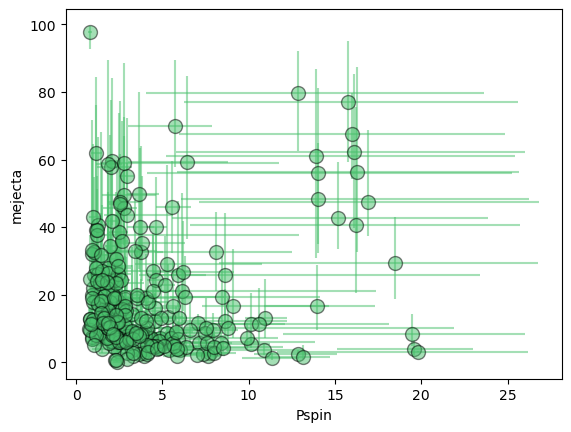

In [8]:
import matplotlib.pyplot as plt
# Import colorblind friendly green
from slsne.utils import cb_g

# Plot individual light curves shaded.
plt.errorbar(params[f'cen_{x_param}'], params[f'cen_{y_param}'], xerr = [params[f'dn_{x_param}'], params[f'up_{x_param}']],
             yerr = [params[f'dn_{y_param}'], params[f'up_{y_param}']], fmt = 'o', color = cb_g, markersize = 10, alpha = 0.5,
             markeredgecolor = 'k', zorder = 300 )
plt.xlabel(x_param)
plt.ylabel(y_param)
plt.show();